In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [64]:
nba_teams_path = r"C:/Users/shane/Downloads/Nba Teams Dataset.xlsx"
df_yearly_team_stats = pd.read_excel(nba_teams_path, sheet_name='Yearly Team Stats', header=None)

# Remove first row 
df_yearly_team_stats = df_yearly_team_stats.drop(index=0).reset_index(drop=True)

# Set the second row as the header and then remove the second row
df_yearly_team_stats.columns = df_yearly_team_stats.iloc[0]
df_yearly_team_stats = df_yearly_team_stats.drop(index=0).reset_index(drop=True)

Data Cleaning

In [65]:
# Rename columnd
df_yearly_team_stats = df_yearly_team_stats.rename(columns={'#Team': 'Team'})
df_yearly_team_stats = df_yearly_team_stats.rename(columns={'Year↓': 'Year'})

# Drop last row of Df (totals row)
df_yearly_team_stats = df_yearly_team_stats.drop(df_yearly_team_stats.index[-1])

# Remove numbers from the beginning of each team name
df_yearly_team_stats['Team'] = df_yearly_team_stats['Team'].str.replace(r'^\d+', '', regex=True).str.strip()

# Remove emoji from Teams that won championship
df_yearly_team_stats['Team'] = df_yearly_team_stats['Team'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Drop Playoff Columns (Index 18 to 31)
df_yearly_team_stats = df_yearly_team_stats.iloc[:, :18]

# Convert columns to proper data type
df_yearly_team_stats['Year'] = df_yearly_team_stats['Year'].astype(int)
df_yearly_team_stats['TR'] = pd.to_numeric(df_yearly_team_stats['TR'], errors='coerce')
df_yearly_team_stats['Age'] = pd.to_numeric(df_yearly_team_stats['Age'], errors='coerce')
df_yearly_team_stats['W'] = pd.to_numeric(df_yearly_team_stats['W'], errors='coerce')
df_yearly_team_stats['L'] = pd.to_numeric(df_yearly_team_stats['L'], errors='coerce')
df_yearly_team_stats['SRS'] = pd.to_numeric(df_yearly_team_stats['SRS'], errors='coerce')
df_yearly_team_stats['ORtg'] = pd.to_numeric(df_yearly_team_stats['ORtg'], errors='coerce')
df_yearly_team_stats['rORtg'] = pd.to_numeric(df_yearly_team_stats['rORtg'], errors='coerce')
df_yearly_team_stats['DRtg'] = pd.to_numeric(df_yearly_team_stats['DRtg'], errors='coerce')
df_yearly_team_stats['rDRtg'] = pd.to_numeric(df_yearly_team_stats['rDRtg'], errors='coerce')
df_yearly_team_stats['NRtg'] = pd.to_numeric(df_yearly_team_stats['NRtg'], errors='coerce')
df_yearly_team_stats['Pace'] = pd.to_numeric(df_yearly_team_stats['Pace'], errors='coerce')
df_yearly_team_stats['rPace'] = pd.to_numeric(df_yearly_team_stats['rPace'], errors='coerce')
df_yearly_team_stats['FTr'] = pd.to_numeric(df_yearly_team_stats['FTr'], errors='coerce')
df_yearly_team_stats['rFTr'] = pd.to_numeric(df_yearly_team_stats['rFTr'], errors='coerce')
df_yearly_team_stats['TS%'] = pd.to_numeric(df_yearly_team_stats['TS%'], errors='coerce')
df_yearly_team_stats['rTS%'] = pd.to_numeric(df_yearly_team_stats['rTS%'], errors='coerce')

# Drop Years prior to 2016
df_yearly_team_stats = df_yearly_team_stats[df_yearly_team_stats['Year'] >= 2016]

# Perform one hot encoding on Team column 
nba_teams = [
    "Atlanta Hawks", "Boston Celtics", "Brooklyn Nets", "Charlotte Hornets", "Chicago Bulls",
    "Cleveland Cavaliers", "Dallas Mavericks", "Denver Nuggets", "Detroit Pistons",
    "Golden State Warriors", "Houston Rockets", "Indiana Pacers", "Los Angeles Clippers",
    "Los Angeles Lakers", "Memphis Grizzlies", "Miami Heat", "Milwaukee Bucks",
    "Minnesota Timberwolves", "New Orleans Pelicans", "New York Knicks",
    "Oklahoma City Thunder", "Orlando Magic", "Philadelphia 76ers", "Phoenix Suns",
    "Portland Trail Blazers", "Sacramento Kings", "San Antonio Spurs", "Toronto Raptors",
    "Utah Jazz", "Washington Wizards"
]

# Concat into 1 df
df_one_hot_encoded = pd.get_dummies(df_yearly_team_stats['Team'])
df_one_hot_encoded = df_one_hot_encoded.reindex(columns=nba_teams, fill_value=0)
df_yearly_team_stats = pd.concat([df_yearly_team_stats, df_one_hot_encoded], axis=1)

# Drop Team column 
df_yearly_team_stats = df_yearly_team_stats.drop(columns=['Team'])




In [66]:
# Save to CSV
df_yearly_team_stats.to_csv('df_yearly_team_stats.csv', index=False)


In [67]:
print (df_yearly_team_stats)

     Year    TR   Age   W   L   SRS   ORtg  rORtg   DRtg  rDRtg  ...  \
0    2024  14.0  28.2  64  18  10.8  123.2    8.6  111.6   -3.0  ...   
1    2024   9.3  27.2  56  26   6.4  115.6    1.0  109.0   -5.6  ...   
2    2024   9.1  23.4  57  25   7.4  119.5    4.9  112.1   -2.5  ...   
3    2024   7.8  26.5  50  32   2.3  117.6    3.0  115.4    0.8  ...   
4    2024   5.8  25.3  47  35   2.8  121.0    6.4  118.0    3.4  ...   
..    ...   ...   ...  ..  ..   ...    ...    ...    ...    ...  ...   
265  2016  -4.6  30.5  42  40  -2.1  105.4   -1.0  107.8    1.4  ...   
266  2016  -7.1  26.0  23  59  -6.3  102.2   -4.2  109.0    2.6  ...   
267  2016  -7.9  26.9  21  61  -7.1  103.2   -3.2  110.9    4.5  ...   
268  2016  -9.9  26.5  17  65  -8.9  101.6   -4.8  111.6    5.2  ...   
269  2016 -11.2  23.3  10  72  -9.9   98.8   -7.6  109.2    2.8  ...   

     Oklahoma City Thunder  Orlando Magic  Philadelphia 76ers  Phoenix Suns  \
0                    False          False               

Feature Selection

In [59]:
# Define Features 
X = df_yearly_team_stats.drop(columns=['ORtg'])
y = df_yearly_team_stats['ORtg']

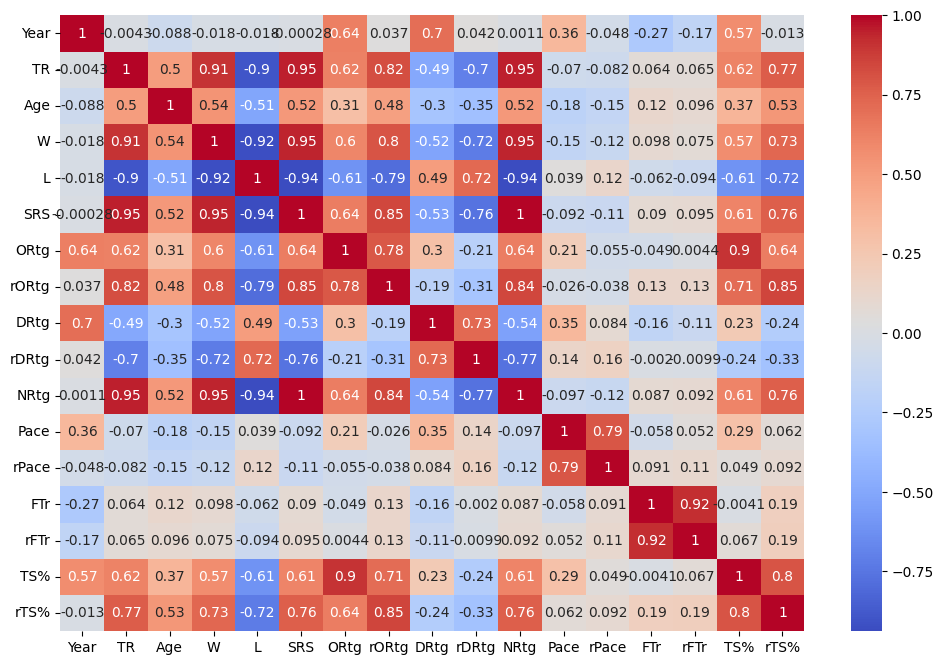

In [72]:
# Correlation matrix
df_plot = df_yearly_team_stats.iloc[:, 0:17]
corr_matrix = df_plot.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()